# *Diabetic_Predection*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [ ]:
df=pd.read_csv("/content/diabetes_data.csv")

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# ***COLUMNS_DETAILS***

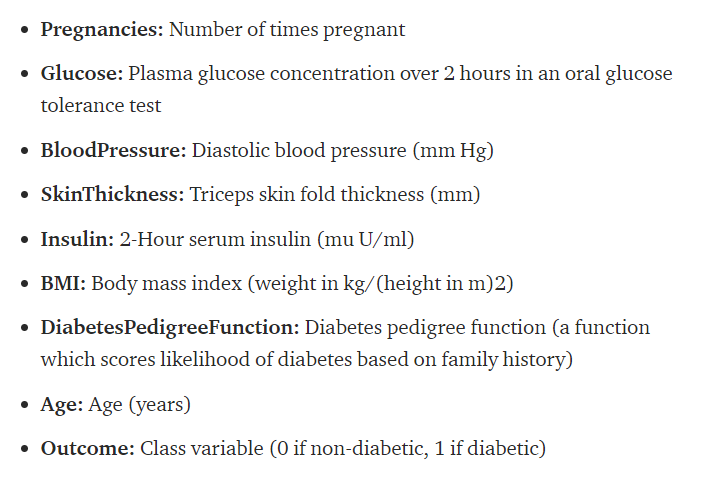

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.corr(method='pearson',min_periods=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


[]

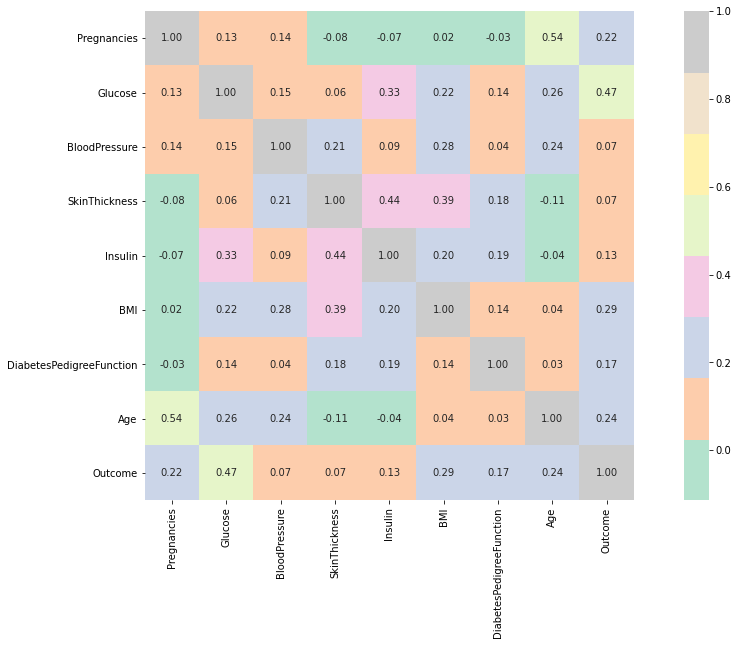

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cbar=True,square=True,fmt=('.2f'),annot=True,annot_kws={'size':10},cmap='Pastel2')
plt.plot()

In [ ]:
for col in df.columns:
  print(col,',', 'Unique :',len(df[col].unique()),df.groupby('Outcome')[col].count())

Pregnancies , Unique : 17 Outcome
0    500
1    268
Name: Pregnancies, dtype: int64
Glucose , Unique : 136 Outcome
0    500
1    268
Name: Glucose, dtype: int64
BloodPressure , Unique : 47 Outcome
0    500
1    268
Name: BloodPressure, dtype: int64
SkinThickness , Unique : 51 Outcome
0    500
1    268
Name: SkinThickness, dtype: int64
Insulin , Unique : 186 Outcome
0    500
1    268
Name: Insulin, dtype: int64
BMI , Unique : 248 Outcome
0    500
1    268
Name: BMI, dtype: int64
DiabetesPedigreeFunction , Unique : 517 Outcome
0    500
1    268
Name: DiabetesPedigreeFunction, dtype: int64
Age , Unique : 52 Outcome
0    500
1    268
Name: Age, dtype: int64
Outcome , Unique : 2 Outcome
0    500
1    268
Name: Outcome, dtype: int64


In [ ]:
import ipywidgets as widget
from IPython.display import display

In [ ]:
wig_col=widget.Dropdown(
    options=[col for col in df.columns.tolist()],
    description ="Plots Vizulization",
    layout=widget.Layout(width='30%',height='40px')
)

Dropdown(description='Plots Vizulization', layout=Layout(height='40px', width='30%'), options=('Pregnancies', …

[]

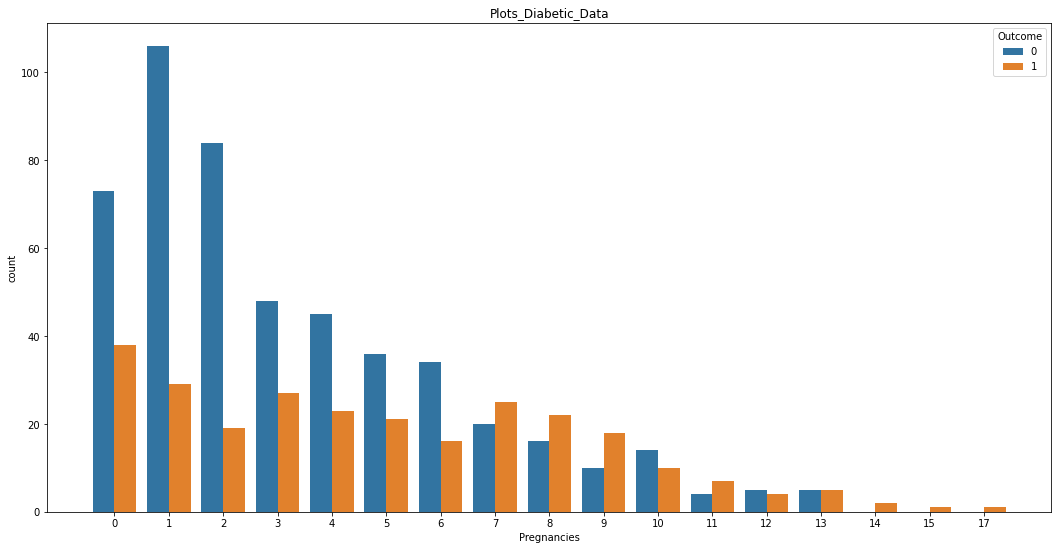

In [ ]:
display(wig_col)
plt.figure(figsize=(18,9))
plt.title('Plots_Diabetic_Data')
sns.countplot(x=wig_col.value,data=df,hue='Outcome')
sns.set_style('darkgrid')
plt.plot()

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

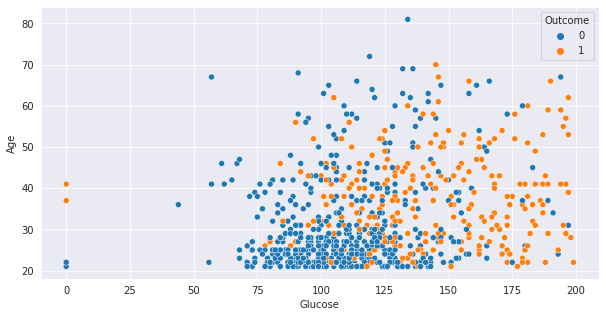

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Glucose',y='Age',data=df,hue='Outcome')

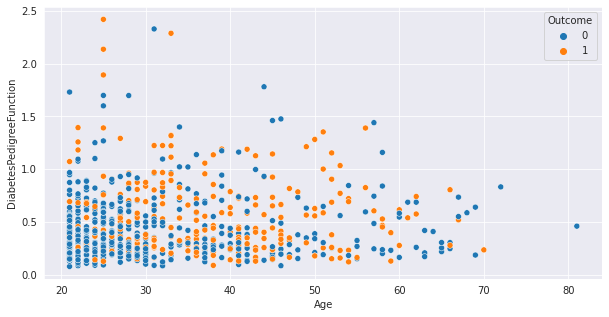

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age',y='DiabetesPedigreeFunction',data=df,hue='Outcome')

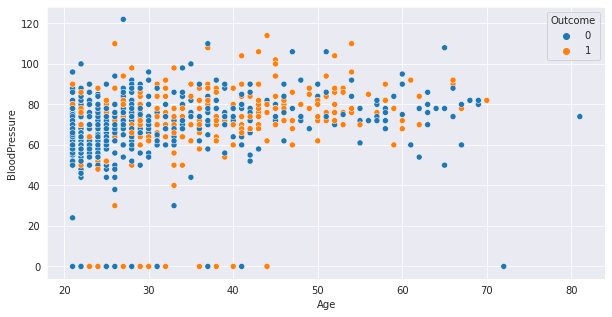

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age',y='BloodPressure',data=df,hue='Outcome')

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
(df['DiabetesPedigreeFunction']>0.5).sum()

277

In [ ]:
((df['DiabetesPedigreeFunction']<=0.3) & (df['Outcome']==1)).sum()

82

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
sc=StandardScaler()

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X=sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [ ]:
model_Knn=KNeighborsClassifier()

In [ ]:
model_Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn=model_Knn.predict(X_test)

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred_knn))

Accuracy_Score : 0.7705627705627706


In [ ]:
error_rate=[]
for i in range(1,50):
  model_Knn=KNeighborsClassifier(n_neighbors=i)
  model_Knn.fit(X_train,y_train)
  pred_i=model_Knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test)
  )

Text(0, 0.5, 'Error Rate')

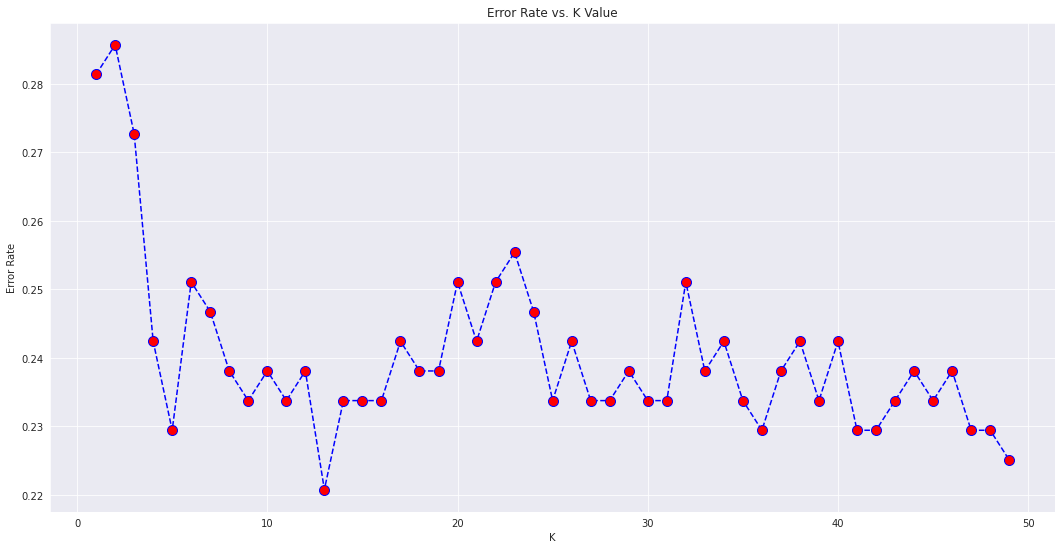

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
model_Knn=KNeighborsClassifier(n_neighbors=13)
model_Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred_13=model_Knn.predict(X_test)

In [ ]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred_13))

Accuracy_Score : 0.7792207792207793


In [ ]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_lr=model_lr.predict(X_test)
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_lr))

Accuracy_Score : 0.7792207792207793


In [ ]:
model_svc=SVC()
model_svc.fit(X_train,y_train)
y_svc=model_svc.predict(X_test)
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_svc))
print('Report',metrics.classification_report(y_test,y_svc))
print("Confusion_Matrix :",metrics.confusion_matrix(y_test,y_svc))

Accuracy_Score : 0.7532467532467533
Report               precision    recall  f1-score   support

           0       0.78      0.88      0.83       157
           1       0.65      0.49      0.56        74

    accuracy                           0.75       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231

Confusion_Matrix : [[138  19]
 [ 38  36]]


In [ ]:
X1=df.iloc[:,:-1]
y1=df.iloc[:,-1]

In [ ]:
print(X1.shape)
print(y1.shape)

(768, 8)
(768,)


In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.3,random_state=0)

In [ ]:
model_DTC=DecisionTreeClassifier()
model_DTC.fit(X1_train,y1_train)
y_DTC=model_DTC.predict(X1_test)

In [ ]:
print("Accuracy_Score :",metrics.accuracy_score(y1_test,y_DTC))
print('Report',metrics.classification_report(y1_test,y_DTC))
print("Confusion_Matrix :",metrics.confusion_matrix(y1_test,y_DTC))

Accuracy_Score : 0.7272727272727273
Report               precision    recall  f1-score   support

           0       0.82      0.77      0.79       157
           1       0.57      0.64      0.60        74

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.74      0.73      0.73       231

Confusion_Matrix : [[121  36]
 [ 27  47]]


In [ ]:
model_RFC=RandomForestClassifier()
model_RFC.fit(X1_train,y1_train)
y_RFC=model_RFC.predict(X1_test)
print("Accuracy_Score :",metrics.accuracy_score(y1_test,y_RFC))
print('Report',metrics.classification_report(y1_test,y_RFC))
print("Confusion_Matrix :",metrics.confusion_matrix(y1_test,y_RFC))

Accuracy_Score : 0.7835497835497836
Report               precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231

Confusion_Matrix : [[141  16]
 [ 34  40]]


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression())])
pipe_SVC=Pipeline([('scaler2',StandardScaler()),
                    ('SVR',SVC())])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])

In [ ]:
pipeline1=[pipe_LR,pipe_SVC,pipe_DT,pipe_RF,pipe_Knn]

In [ ]:
pipe_dict={0:'LogisticRegression',1:'KNeighborsClassifier',2:'SVC',3:'DecisionTreeClassifier',4:'RandomForestClassifier'}

In [ ]:
for pipe in pipeline1:
  pipe.fit(X_train,y_train)

In [ ]:
for i,models in enumerate(pipeline1):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test,y_test)))

LogisticRegression Accuracy : 0.7792207792207793
KNeighborsClassifier Accuracy : 0.7575757575757576
SVC Accuracy : 0.7402597402597403
DecisionTreeClassifier Accuracy : 0.7748917748917749
RandomForestClassifier Accuracy : 0.7705627705627706
